In [4]:
%matplotlib inline

from pathlib import Path
import pandas as pd
import numpy as np
import math
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, accuracy_score
from utilities import plotDecisionTree, regressionSummary, printConfusionMatrix, classificationSummary
import matplotlib.pylab as plt
import warnings
warnings.filterwarnings("ignore")

(10 points) Run a regression tree (RT) with the output variable Price and input variables Age_08_04, KM, Fuel_Type (= Petrol and Diesel), HP, Automatic, Doors, Quarterly_Tax, Mfg_Guarantee, Guarantee_Period, Airco, Automatic_Airco, CD_Player, Powered_Windows, Sport_Model, and Tow_Bar.

In [5]:
DATA = Path('.').resolve().parent / 'data'
'''
csvfile = DATA/'ToyotaCorolla.csv'
with open(csvfile, 'rb') as f:
    for i, line in enumerate(f, 1):
        try:
            s = line.decode('utf-8')
        except UnicodeDecodeError as err:
            print('ERROR AT LINE', i, repr(line))
            break
'''
car_df = pd.read_csv(DATA/'ToyotaCorolla.csv', encoding='utf-8')
df_Fuel_Type = pd.get_dummies(car_df['Fuel_Type'])
car_df = pd.concat([car_df, df_Fuel_Type], axis=1)
car_df.columns
car_df.drop(columns = ['Id', 'Model', 'Mfg_Month', 'Mfg_Year', 'Fuel_Type', 'Met_Color', 'Color', 'CC', 
                       'Cylinders', 'Gears',  'Weight', 'BOVAG_Guarantee', 'ABS', 'Airbag_1', 'Airbag_2', 
                       'Boardcomputer', 'Central_Lock',  'Power_Steering', 'Radio', 'Mistlamps',  'Backseat_Divider', 
                       'Metallic_Rim', 'Radio_cassette', 'Parking_Assistant',  'CNG',], inplace = True)
columns = list(car_df.columns)
columns.remove('Price')
columns.append('Price')
car_df = car_df[columns]
trainData = car_df.sample(frac=0.6, random_state=12345)
validData = car_df.drop(trainData.index)
validData.head()

,Age_08_04,KM,HP,Automatic,Doors,Quarterly_Tax,Mfr_Guarantee,Guarantee_Period,Airco,Automatic_airco,CD_Player,Powered_Windows,Sport_Model,Tow_Bar,Diesel,Petrol,Price
1,23,72937,90,0,3,210,0,3,1,0,1,0,0,0,1,0,13750
5,32,61000,90,0,3,210,0,3,1,0,0,1,0,0,1,0,12950
13,31,23000,192,0,3,100,1,3,1,1,1,1,1,0,0,1,21500
16,30,34000,192,0,3,100,0,3,1,1,1,1,0,0,0,1,22750
18,24,25563,110,0,3,19,0,3,1,1,1,1,0,0,0,1,16750


In [6]:
regTree = DecisionTreeRegressor(random_state=123456)
regTree.fit(trainData.drop(columns=['Price']), trainData['Price'])
print('RT treenodes =',regTree.tree_.node_count)

RT treenodes = 1519


In [7]:
columns = trainData.columns[:-1]
importances = regTree.feature_importances_
indices = np.argsort(importances)[::-1]
# Print the feature ranking
print("Feature ranking:")

for i in range(len(columns)):
    idx = indices[i]
    print("%d. feature %d (%.3f, %s)" % (i + 1, idx, importances[idx], columns[idx]))
print('The four most important car spec for predicting the car’s price: ', [columns[idx] for idx in indices[0:4]])

Feature ranking:
1. feature 0 (0.844, Age_08_04)
2. feature 5 (0.047, Quarterly_Tax)
3. feature 1 (0.044, KM)
4. feature 2 (0.025, HP)
5. feature 11 (0.006, Powered_Windows)
6. feature 8 (0.006, Airco)
7. feature 4 (0.004, Doors)
8. feature 10 (0.004, CD_Player)
9. feature 6 (0.004, Mfr_Guarantee)
10. feature 13 (0.004, Tow_Bar)
11. feature 12 (0.003, Sport_Model)
12. feature 9 (0.003, Automatic_airco)
13. feature 7 (0.003, Guarantee_Period)
14. feature 15 (0.002, Petrol)
15. feature 3 (0.001, Automatic)
16. feature 14 (0.000, Diesel)
The four most important car spec for predicting the car’s price:  ['Age_08_04', 'Quarterly_Tax', 'KM', 'HP']


Compare the prediction errors of the training, and validation, by examining their RMSE.
Redo the tree, this time adjusting the parameters to yield a shallower tree.  Compare the RMSE to the deeper tree.
deeper tree has 0 RMSE in training data, but very big RMSE in validation data
shallower tree will increase RMSE in training data, but RMSE will decrease a bit.

In [8]:
regTree_predTrain = regTree.predict(trainData.drop(columns=['Price']))
print(regressionSummary(trainData['Price'], regTree_predTrain))
regTree_predValid = regTree.predict(validData.drop(columns=['Price']))
print(regressionSummary(validData['Price'], regTree_predValid))


Regression statistics

                      Mean Error (ME) : 0.0000
       Root Mean Squared Error (RMSE) : 0.0000
            Mean Absolute Error (MAE) : 0.0000
          Mean Percentage Error (MPE) : 0.0000
Mean Absolute Percentage Error (MAPE) : 0.0000
None

Regression statistics

                      Mean Error (ME) : 52.9425
       Root Mean Squared Error (RMSE) : 1423.7010
            Mean Absolute Error (MAE) : 1058.7509
          Mean Percentage Error (MPE) : -0.9238
Mean Absolute Percentage Error (MAPE) : 10.8078
None


In [9]:
regTree = DecisionTreeRegressor(random_state=123456, max_depth=4)
regTree.fit(trainData.drop(columns=['Price']), trainData['Price'])
regTree_predTrain = regTree.predict(trainData.drop(columns=['Price']))
print(regressionSummary(trainData['Price'], regTree_predTrain))
regTree_predValid = regTree.predict(validData.drop(columns=['Price']))
print(regressionSummary(validData['Price'], regTree_predValid))


Regression statistics

                      Mean Error (ME) : 0.0000
       Root Mean Squared Error (RMSE) : 1209.7451
            Mean Absolute Error (MAE) : 918.2028
          Mean Percentage Error (MPE) : -1.2926
Mean Absolute Percentage Error (MAPE) : 8.9759
None

Regression statistics

                      Mean Error (ME) : 9.4569
       Root Mean Squared Error (RMSE) : 1316.2933
            Mean Absolute Error (MAE) : 982.2430
          Mean Percentage Error (MPE) : -1.7821
Mean Absolute Percentage Error (MAPE) : 9.9962
None


Fit a regression tree using cross-validation to choose the best setting for the tree depth.  Compare its prediction errors in the training and validation sets.

the best validation RMSE:
 depth           7.000000
meanRMSE     1282.961576
validRMSE    1237.358409
Name: 6, dtype: float64


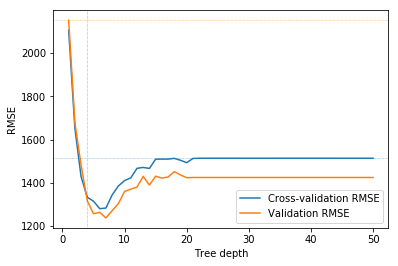

,depth,meanRMSE,validRMSE
0,1,2105.212018,2151.740101
1,2,1652.415500,1678.162281
2,3,1427.757442,1481.753847
3,4,1333.198698,1316.293259
4,5,1314.490401,1256.709411
5,6,1280.033755,1263.348097
6,7,1282.961576,1237.358409
7,8,1343.746687,1270.558709
8,9,1384.878588,1303.623534
9,10,1410.153326,1359.486253


In [10]:
indVars = trainData.drop(columns=['Price'])
depVars = trainData['Price']
results = []
for max_depth in range(1,51):
    treeRegressor = DecisionTreeRegressor(random_state=12345, max_depth=max_depth)
    scores = cross_val_score(treeRegressor, indVars, depVars, cv=5, scoring='neg_mean_squared_error')
    rmse = np.sqrt(-scores)
    treeRegressor.fit(indVars, depVars)
    results.append({'depth': max_depth, 'meanRMSE': rmse.mean(),
                    'validRMSE': np.sqrt(mean_squared_error(validData['Price'], 
                                                    treeRegressor.predict(validData.drop(columns=['Price']))))})
results_df = pd.DataFrame(results)
print('the best validation RMSE:\n',results_df.loc[results_df.validRMSE.idxmin()])
ax = results_df.plot(x='depth', y='meanRMSE', label='Cross-validation RMSE')
results_df.plot(x='depth', y='validRMSE', ax=ax, label='Validation RMSE')
ax.set_xlabel('Tree depth')
ax.set_ylabel('RMSE')
ax.axhline(y=results_df.validRMSE.max(), color='C1', linewidth=0.5, linestyle='dotted')
ax.axhline(y=results_df.meanRMSE.median(), color='C0', linewidth=0.5, linestyle='dotted')
ax.axvline(x=4, color='C0', linewidth=0.5, linestyle='dotted')
plt.show()
results_df.head(15)

In [12]:
newCar = pd.DataFrame([{'Age_08_04':77, 'KM':117000, 'HP':110, 'Automatic':0, 'Doors':5, 'Quarterly_Tax':100,
       'Mfr_Guarantee':0, 'Guarantee_Period':3, 'Airco':1, 'Automatic_airco':0,
       'CD_Player':0, 'Powered_Windows':0, 'Sport_Model':0, 'Tow_Bar':1, 'Diesel':0,
       'Petrol':1}])
regTree = DecisionTreeRegressor(random_state=123456, max_depth=7)
regTree.fit(trainData.drop(columns=['Price']), trainData['Price'])
print('the predicted price of a used Toyota Corolla with the specifications listed in the table = %.0f' %regTree.predict(newCar)[0])

the predicted price of a used Toyota Corolla with the specifications listed in the table = 8292


(10 points) Let us see the effect of turning the price variable into a categorical variable. First, create a new variable that categorizes price into 20 bins. Now repartition the data keeping Binned Price instead of Price. Run a classification tree (CT) with the same set of input variables as in the RT, and with Binned Price as the output variable. Set the model parameters so as to build a deep tree. 
turning the price variable into a categorical variable to run deep tree the same as RT above, 
Compare the tree generated by the CT with the one generated by the RT. Are they different? (Look at structure, the top predictors, size of tree, etc.)
CT will have much better result on validation set than RT
Size of CT is smaller than RT if under the same input(deep tree), the top predictors has difference too since different features has different effect between CT and RT.

In [13]:
copy = car_df.Price
priceBin = pd.cut(copy, 20).cat.categories

In [14]:
car_df.Price = pd.cut(car_df.Price, 20, labels=False).astype('category') # gives the bin numbers
trainData = car_df.sample(frac=0.6, random_state=12345)
validData = car_df.drop(trainData.index)
validData.head()
classTree = DecisionTreeClassifier(random_state=123456)
classTree.fit(trainData.drop(columns=['Price']), trainData['Price'])
classTree_predTrain = classTree.predict(trainData.drop(columns=['Price']))
print('deep tree on train data acccuracy=', accuracy_score(trainData['Price'], classTree_predTrain))
classTree_predValid = classTree.predict(validData.drop(columns=['Price']))
print('deep tree on valid data acccuracy=', accuracy_score(validData['Price'], classTree_predValid))

print('CT treenodes = ', classTree.tree_.node_count)
columns = trainData.columns[:-1]
importances = classTree.feature_importances_
indices = np.argsort(importances)[::-1]
# Print the feature ranking
print("Feature ranking:")

for i in range(len(columns)):
    idx = indices[i]
    print("%d. feature %d (%.3f, %s)" % (i + 1, idx, importances[idx], columns[idx]))
print('The four most important car spec for predicting the car’s price: ', [columns[idx] for idx in indices[0:4]])

deep tree on train data acccuracy= 1.0
deep tree on valid data acccuracy= 0.43902439024390244
CT treenodes =  777
Feature ranking:
1. feature 0 (0.326, Age_08_04)
2. feature 1 (0.315, KM)
3. feature 5 (0.047, Quarterly_Tax)
4. feature 6 (0.043, Mfr_Guarantee)
5. feature 2 (0.042, HP)
6. feature 13 (0.041, Tow_Bar)
7. feature 4 (0.035, Doors)
8. feature 8 (0.031, Airco)
9. feature 11 (0.029, Powered_Windows)
10. feature 10 (0.023, CD_Player)
11. feature 12 (0.020, Sport_Model)
12. feature 7 (0.018, Guarantee_Period)
13. feature 9 (0.015, Automatic_airco)
14. feature 3 (0.006, Automatic)
15. feature 14 (0.005, Diesel)
16. feature 15 (0.004, Petrol)
The four most important car spec for predicting the car’s price:  ['Age_08_04', 'KM', 'Quarterly_Tax', 'Mfr_Guarantee']


In [16]:
indVars = trainData.drop(columns=['Price'])
depVars = trainData['Price']
results = []
for max_depth in range(1,51):
    treeClassifier = DecisionTreeClassifier(random_state=12345, max_depth=max_depth)
    scores = cross_val_score(treeClassifier, indVars, depVars, cv=5)
    treeClassifier.fit(indVars, depVars)
    results.append({'depth': max_depth, 'meanAccuracy': scores.mean(),
                    'validAccuracy': accuracy_score(validData['Price'], 
                                                    treeClassifier.predict(validData.drop(columns=['Price'])))})
results_df = pd.DataFrame(results)
print('the best validation accuracy:\n',results_df.loc[results_df.validAccuracy.idxmax()])
results_df

the best validation accuracy:
 depth            5.000000
meanAccuracy     0.455246
validAccuracy    0.489547
Name: 4, dtype: float64


,depth,meanAccuracy,validAccuracy
0,1,0.341156,0.343206
1,2,0.441294,0.454704
2,3,0.475078,0.484321
3,4,0.448646,0.468641
4,5,0.455246,0.489547
5,6,0.456600,0.463415
6,7,0.428790,0.480836
7,8,0.402100,0.468641
8,9,0.410730,0.454704
9,10,0.395356,0.479094


In [18]:
classTree = DecisionTreeRegressor(random_state=123456, max_depth=5)
classTree.fit(trainData.drop(columns=['Price']), trainData['Price'])
predictPrice = classTree.predict(newCar)[0]
print('the predicted price bin index using the specifications listed in the table = %.0f' %predictPrice)
print('the price range is in ', priceBin[int(predictPrice)])

the predicted price bin index using the specifications listed in the table = 2
the price range is in  (7165.0, 8572.5]


the magnitude of the difference between the two predictions, and the advantages and disadvantages of the two methods.

using RT tree, since the output is exact price value, it is very easy to overfit the traindata when using default deep tree since some very high or low price will have strong effect when fitting model, but CT tree can be better due to the price are in bin range. RT tree will oversee some single feature importance if not fit by cross validation etc. The advantage of RT tree is the price is in exact value, CT tree is in a range. 